Mark Belikov 5/7/24

In [1]:
import pandas as pd

#Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_apple_apps.csv')

#cleaned data
print("Shape of the DataFrame:", df_cleaned.shape)
print("\nColumns in the DataFrame:", df_cleaned.columns)
print("\nData types of columns:\n", df_cleaned.dtypes)
print("\nSummary statistics:\n", df_cleaned.describe())
print("\nFirst few rows:\n", df_cleaned.head())
print("\nLast few rows:\n", df_cleaned.tail())
print("\nRandom sample of rows:\n", df_cleaned.sample())
print("\nAdditional information:\n")
df_cleaned.info()


Shape of the DataFrame: (7032, 6)

Columns in the DataFrame: Index(['id', 'track_name', 'size_bytes', 'app_desc', 'size_megabytes',
       'first_word'],
      dtype='object')

Data types of columns:
 id                  int64
track_name         object
size_bytes          int64
app_desc           object
size_megabytes    float64
first_word         object
dtype: object

Summary statistics:
                  id    size_bytes  size_megabytes
count  7.032000e+03  7.032000e+03     7032.000000
mean   8.619146e+08  1.563911e+08      149.146142
std    2.724385e+08  2.021995e+08      192.832507
min    2.816565e+08  5.898240e+05        0.562500
25%    5.977483e+08  4.570675e+07       43.589355
50%    9.779619e+08  9.480141e+07       90.409668
75%    1.082705e+09  1.723884e+08      164.402344
max    1.188376e+09  1.274243e+09     1215.212891

First few rows:
           id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Prem

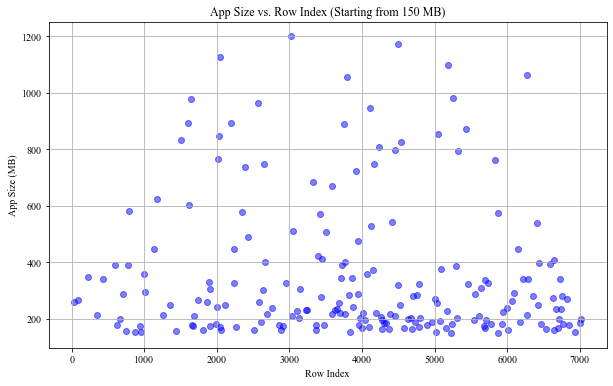

In [51]:
import matplotlib.pyplot as plt

#Start at 150 MB
filtered_df = df_cleaned[df_cleaned['size_megabytes'] >= 150]

#Gets 1 from every 10 rows
sampling_interval = 10
sampled_df = filtered_df[filtered_df.index % sampling_interval == 0]

#Plots the graph
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df.index, sampled_df['size_megabytes'], color='blue', alpha=0.5)
plt.title('App Size vs. Row Index (Starting from 150 MB)')
plt.xlabel('Row Index')
plt.ylabel('App Size (MB)')
plt.grid(True)
plt.show()


In [ ]:
2. What are the most common words in apps on the app store. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


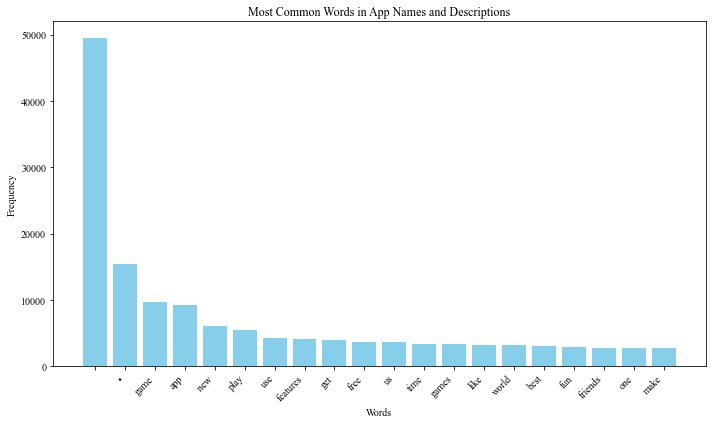

In [52]:
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

#Download NLTK stopwords data
nltk.download('stopwords')

#gets rid of some words and others like punctuation
words = df_cleaned['track_name'].str.lower().str.split() + df_cleaned['app_desc'].str.lower().str.split()
words = [word.translate(str.maketrans('', '', string.punctuation)) for sublist in words for word in sublist if word not in stop_words]

#Count word frequencies
word_freq = Counter(words)

#Gets the most common words
most_common_words = word_freq.most_common(20)

#Extract words and frequencies for plotting
words, frequencies = zip(*most_common_words)

#Plots the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in App Names and Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1. I converted the size_bytes column to megabytes.
2. I got rid of special characters and punctuation to make it easier to read the cleaned data. 
3. I added a new column called first_word because I thought it would make it easier to look at the data. 